# Autoencoder based KMeans Clustering

Load the Fashion MNIST dataset in Jupyter into fashion/data folder and start running the below cells (i.e Create the fashion folder and create data folder within it and copy all the Fashion MNIST zip files) Note: Please unzip the datasets in data folder and delete the zip files No external python file is needed to run the below code Single Layer, Multi Layer and CNN are all included in this single ipynb file

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


In [3]:
from itertools import chain
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte'% kind)
    
    with open(labels_path,'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with open(images_path,'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels),28,28)
    return images, labels

In [5]:
train_X, train_Y = load_mnist('fashion/data', kind='train')
test_X, test_Y = load_mnist('fashion/data', kind='t10k')
print('Training Data: {}'.format(train_X.shape))
print('Training Labels: {}'.format(train_Y.shape))
print('Testing Data: {}'.format(test_X.shape))
print('Testing Labels: {}'.format(test_Y.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [6]:
train_X, X_validate, train_Y, y_validate = train_test_split(train_X, train_Y, test_size=0.25, stratify=train_Y, random_state=123)

train_X = train_X.reshape(-1,28,28,1) / 255
test_X = test_X.reshape(-1,28,28,1) / 255
X_validate = X_validate.reshape(-1,28,28,1) / 255


In [7]:
# Build the autoencoder
model = Sequential()
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))

model.compile(optimizer='adam', loss="mse")
model.summary()

W1113 22:26:19.261162 27668 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1113 22:26:19.282097 27668 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1113 22:26:19.286091 27668 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1113 22:26:19.298077 27668 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1113 22:26:19.301046 27668 deprecation_wrapper.py:119] From C:\Users\Sonal

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 14)        140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 7)         889       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 7)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 7)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 7)           448       
__________

In [8]:
# Train the model
history = model.fit(train_X, train_X, epochs=10, batch_size=64, validation_data=(X_validate,X_validate), verbose=1)

W1113 22:26:27.264272 27668 deprecation_wrapper.py:119] From C:\Users\Sonali\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 83s 2ms/step - loss: 0.0358 - val_loss: 0.0237
Epoch 2/10
45000/45000 [==============================] - 87s 2ms/step - loss: 0.0240 - val_loss: 0.0187
Epoch 3/10
45000/45000 [==============================] - 86s 2ms/step - loss: 0.0219 - val_loss: 0.0170
Epoch 4/10
45000/45000 [==============================] - 84s 2ms/step - loss: 0.0208 - val_loss: 0.0153
Epoch 5/10
45000/45000 [==============================] - 85s 2ms/step - loss: 0.0200 - val_loss: 0.0156
Epoch 6/10
45000/45000 [==============================] - 83s 2ms/step - loss: 0.0195 - val_loss: 0.0155
Epoch 7/10
45000/45000 [==============================] - 79s 2ms/step - loss: 0.0192 - val_loss: 0.0159
Epoch 8/10
45000/45000 [==============================] - 80s 2ms/step - loss: 0.0189 - val_loss: 0.0160
Epoch 9/10
45000/45000 [==============================] - 85s 2ms/step - loss: 0.0187 - val_loss: 0.0159
Epoch

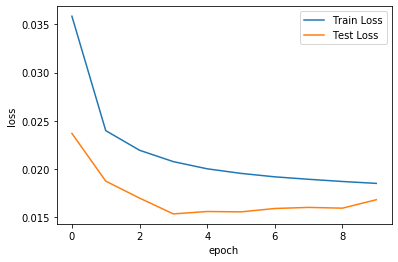

In [20]:
def show_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train Loss', 'Test Loss'], loc='best')
    plt.show()
show_history(history)

In [13]:
restored_testing_dataset = model.predict(test_X)

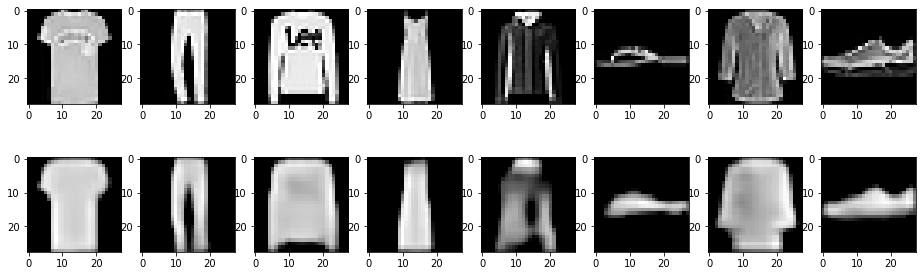

In [15]:
plt.figure(figsize=(20,5))
for i in range(8):
    index = test_Y.tolist().index(i)
    plt.subplot(2, 10, i+1)
    plt.imshow(test_X[index].reshape((28,28)))
    plt.gray()
    plt.subplot(2, 10, i+11)
    plt.imshow(restored_testing_dataset[index].reshape((28,28)))
    plt.gray()

In [16]:
encoder = K.function([model.layers[0].input], [model.layers[4].output])

In [17]:
encoded_images = encoder([test_X])[0].reshape(-1,7*7*7)

In [18]:
kmeans = KMeans(n_clusters=10)
clustered_training_set = kmeans.fit_predict(encoded_images)

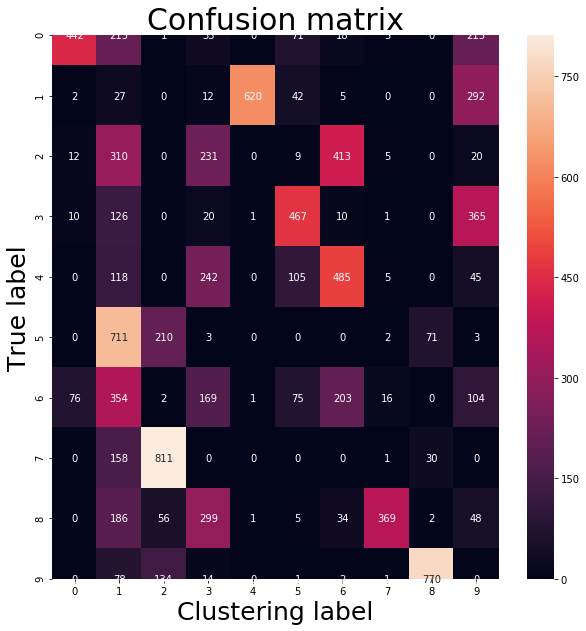

In [19]:
# Observe and compare clustering result with actual label using confusion matrix
cm = confusion_matrix(test_Y, clustered_training_set)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

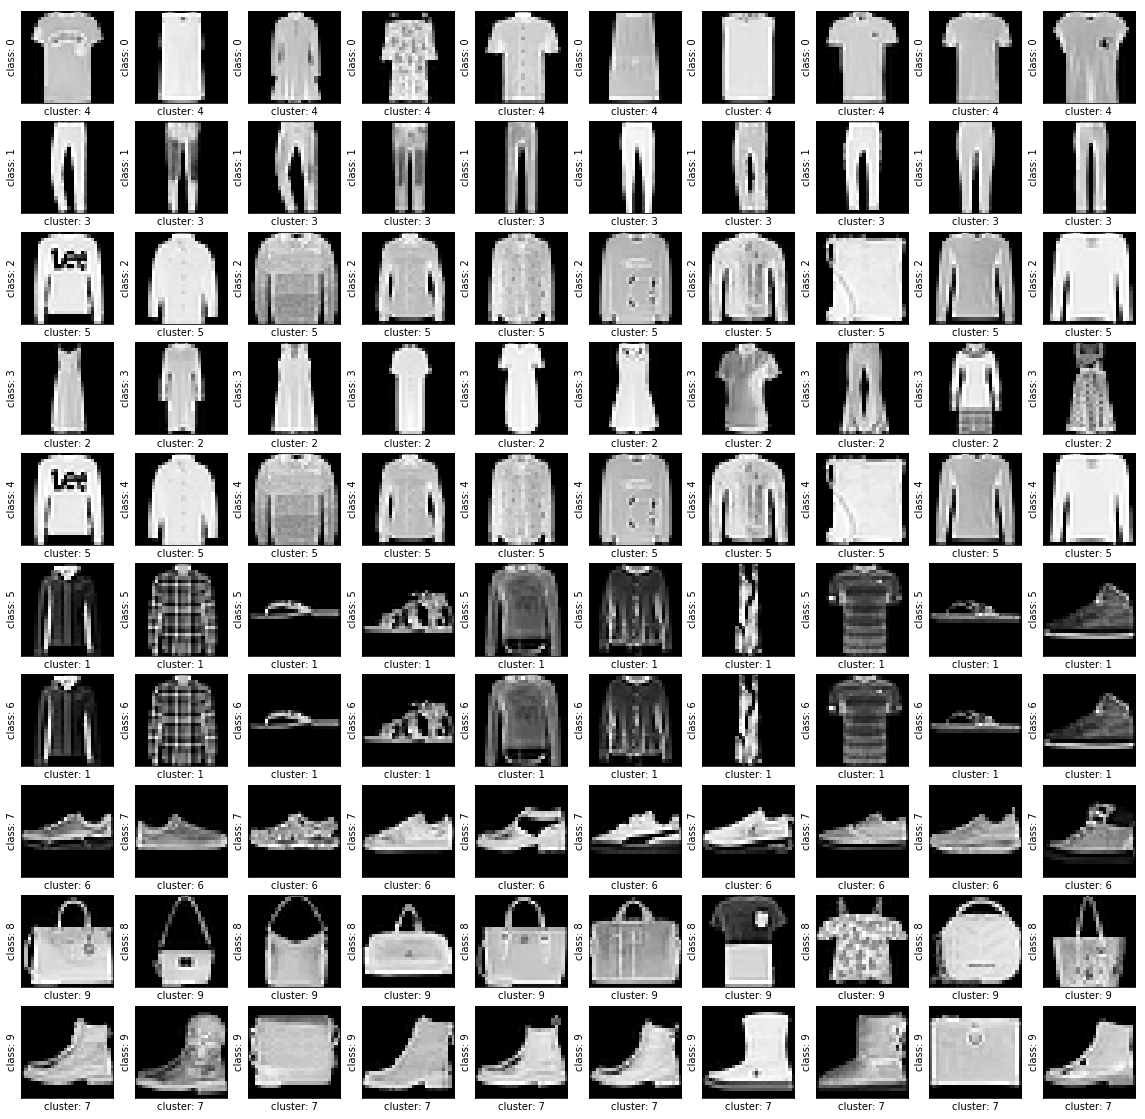

In [14]:
fig = plt.figure(figsize=(20,20))
for r in range(10):
    cluster = cm[r].argmax()
    for c, val in enumerate(test_X[clustered_training_set == cluster][0:10]):
        fig.add_subplot(5, 10, 10*r+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('class: '+str(r))